# Mr Haulage - Fleet Analysis - Cost Analysis
## Author: Lottie Jane Pollard

*"Without data, you're just another person with an opinion." - W. Edwards Deming*


----------------------------------


<img src="/Users/lottiejanepollare/Library/Mobile Documents/com~apple~CloudDocs/CV, Profiles, Interviews & Job Applications/applications/techmodal_analyst_data_engineer/20230825_Analyst_case_study_submission_Lottie_Jane_Pollard/images/logos/techmodal/techmodal_opp_found_logo.png" alt="techmodal_logo" width="350"/>

Income Streams:


<img src="/Users/lottiejanepollare/Library/Mobile Documents/com~apple~CloudDocs/CV, Profiles, Interviews & Job Applications/applications/techmodal_analyst_data_engineer/20230825_Analyst_case_study_submission_Lottie_Jane_Pollard/images/table_1_delivery-payments.png" alt="table_1_delivery-payments" width="350"/>


Trucks & Expenditure:


<img src="/Users/lottiejanepollare/Library/Mobile Documents/com~apple~CloudDocs/CV, Profiles, Interviews & Job Applications/applications/techmodal_analyst_data_engineer/20230825_Analyst_case_study_submission_Lottie_Jane_Pollard/images/table_2_truck_details.png" alt="table_2_truck_details.png" width="1000"/>


In [1]:
# libraries to import

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import the dataset for 01-03-2022 - 31-03-2023, configure the display & have a look at the dataset
NB: it didn't like the metadata way this time for some reason, it would process up until 13/03/2022 then stop so I've converted datatypes manually

In [11]:
# import the dataset
cost_analysis = pd.read_csv('/Users/lottiejanepollare/Library/Mobile Documents/com~apple~CloudDocs/CV, Profiles, Interviews & Job Applications/applications/techmodal_analyst_data_engineer/20230825_Analyst_case_study_submission_Lottie_Jane_Pollard/datasets/EXCEL_MODIFIED_mr_haulage_df_for_cost_analysis.csv')

# configure display settings: display all columns regardless of df width, disable wrapping columns to display entire field, no truncating columns, display an English date format
pd.set_option('display.max.columns', None, 'display.width', None, 'display.max.colwidth', None, 'display.date_dayfirst', True, 'display.float_format', '{:.2f}'.format)
# this should update the date format displayed for the whole notebook, but it isn't & I'm not sure why - maybe as I'm in Pycharm IDE note JupyterNotebooks itself

# let's see what we're working with
cost_analysis

,order_date,delivery_region,box_type,box_count,daily_small_trucks_needed,daily_large_trucks_needed
0,01/03/2022,greater_london,large,1,0,1
1,01/03/2022,south_east,small,1,1,0
2,01/03/2022,south_wales,small,1,1,0
3,01/03/2022,south_west,large,1,0,1
4,01/03/2022,south_west,small,1,1,0
...,...,...,...,...,...,...
1179,29/03/2023,south_east,small,1,1,0
1180,30/03/2023,greater_london,small,2,2,0
1181,30/03/2023,south_east,large,1,0,1
1182,31/03/2023,south_west,small,1,1,0


In [3]:
# let's convert 'order_date' to datetime64 & 'delivery_region' & 'box_type' to category

# convert them in to 'category' datatypes
cost_analysis['box_type'] = cost_analysis['box_type'].astype('category')
cost_analysis['delivery_region'] = cost_analysis['delivery_region'].astype('category')

# let's convert 'order_date' to datetime64 datatype
cost_analysis['order_date'] = pd.to_datetime(cost_analysis['order_date'], format='%d/%m/%Y')

# check the new data types
cost_analysis.dtypes

order_date                   datetime64[ns]
delivery_region                    category
box_type                           category
box_count                             int64
daily_small_trucks_needed             int64
daily_large_trucks_needed             int64
dtype: object

### Let's add in some extra columns to allow for financial analysis
let's create 'week_number', 'order_month', 'order_year' & 'order_quarter' columns based on 'order_date' column

In [4]:
# financial week
cost_analysis['order_week'] = cost_analysis['order_date'].dt.isocalendar().week

# financial month
cost_analysis['order_month'] = cost_analysis['order_date'].dt.strftime('%B')

# financial year
cost_analysis['order_year'] = cost_analysis['order_date'].dt.year

# financial quarter (assuming financial year 1st Jan - 3st Dec)
cost_analysis['financial_quarter'] = cost_analysis['order_date'].dt.month.apply(
    lambda x: 'Q1' if 1 <= x <= 3 else 'Q2' if 4 <= x <= 6 else 'Q3' if 7 <= x <= 9 else 'Q4'
)

cost_analysis

,order_date,delivery_region,box_type,box_count,daily_small_trucks_needed,daily_large_trucks_needed,order_week,order_month,order_year,financial_quarter
0,2022-03-01,greater_london,large,1,0,1,9,March,2022,Q1
1,2022-03-01,south_east,small,1,1,0,9,March,2022,Q1
2,2022-03-01,south_wales,small,1,1,0,9,March,2022,Q1
3,2022-03-01,south_west,large,1,0,1,9,March,2022,Q1
4,2022-03-01,south_west,small,1,1,0,9,March,2022,Q1
...,...,...,...,...,...,...,...,...,...,...
1179,2023-03-29,south_east,small,1,1,0,13,March,2023,Q1
1180,2023-03-30,greater_london,small,2,2,0,13,March,2023,Q1
1181,2023-03-30,south_east,large,1,0,1,13,March,2023,Q1
1182,2023-03-31,south_west,small,1,1,0,13,March,2023,Q1


### let's add in columns to calculate income & expenditure

In [5]:
# Create the 'revenue' column at position 6
cost_analysis.insert(loc=6, column='revenue', value=[100.00 * count if box == 'large' else 20.00 * count for box, count in zip(cost_analysis['box_type'], cost_analysis['box_count'])])

# Create the 'driver_cost_per_day' column at position 7
cost_analysis.insert(loc=7, column='driver_cost', value=[5 * small_trucks + 20 * large_trucks for small_trucks, large_trucks in zip(cost_analysis['daily_small_trucks_needed'], cost_analysis['daily_large_trucks_needed'])])

# Create the 'fuel_cost_per_day' column at position 8
cost_analysis.insert(loc=8, column='fuel_cost', value=[5 * small_trucks + 30 * large_trucks for small_trucks, large_trucks in zip(cost_analysis['daily_small_trucks_needed'], cost_analysis['daily_large_trucks_needed'])])

# Create the 'total_daily_expenditure' column at position 9
cost_analysis.insert(loc=9, column='expenditure', value=cost_analysis['fuel_cost'] + cost_analysis['driver_cost'])

# Create the 'profit_per_day' column at position 10
cost_analysis.insert(loc=10, column='profit', value=cost_analysis['revenue'] - (cost_analysis['fuel_cost'] + cost_analysis['driver_cost']))

# Set the data type for all monetary values to float64 and format to show 2 decimals
monetary_columns = ['revenue', 'fuel_cost', 'driver_cost', 'expenditure', 'profit']
cost_analysis[monetary_columns] = cost_analysis[monetary_columns].astype('float64')
pd.set_option('display.float_format', '{:.2f}'.format)

cost_analysis

,order_date,delivery_region,box_type,box_count,daily_small_trucks_needed,daily_large_trucks_needed,revenue,driver_cost,fuel_cost,expenditure,profit,order_week,order_month,order_year,financial_quarter
0,2022-03-01,greater_london,large,1,0,1,100.00,20.00,30.00,50.00,50.00,9,March,2022,Q1
1,2022-03-01,south_east,small,1,1,0,20.00,5.00,5.00,10.00,10.00,9,March,2022,Q1
2,2022-03-01,south_wales,small,1,1,0,20.00,5.00,5.00,10.00,10.00,9,March,2022,Q1
3,2022-03-01,south_west,large,1,0,1,100.00,20.00,30.00,50.00,50.00,9,March,2022,Q1
4,2022-03-01,south_west,small,1,1,0,20.00,5.00,5.00,10.00,10.00,9,March,2022,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,2023-03-29,south_east,small,1,1,0,20.00,5.00,5.00,10.00,10.00,13,March,2023,Q1
1180,2023-03-30,greater_london,small,2,2,0,40.00,10.00,10.00,20.00,20.00,13,March,2023,Q1
1181,2023-03-30,south_east,large,1,0,1,100.00,20.00,30.00,50.00,50.00,13,March,2023,Q1
1182,2023-03-31,south_west,small,1,1,0,20.00,5.00,5.00,10.00,10.00,13,March,2023,Q1


In [6]:
# Create the 'profit_percentage' column at position 10
cost_analysis.insert(loc=9, column='profit_%', value=(cost_analysis['profit'] / cost_analysis['expenditure']) * 100)
cost_analysis

,order_date,delivery_region,box_type,box_count,daily_small_trucks_needed,daily_large_trucks_needed,revenue,driver_cost,fuel_cost,profit_%,expenditure,profit,order_week,order_month,order_year,financial_quarter
0,2022-03-01,greater_london,large,1,0,1,100.00,20.00,30.00,100.00,50.00,50.00,9,March,2022,Q1
1,2022-03-01,south_east,small,1,1,0,20.00,5.00,5.00,100.00,10.00,10.00,9,March,2022,Q1
2,2022-03-01,south_wales,small,1,1,0,20.00,5.00,5.00,100.00,10.00,10.00,9,March,2022,Q1
3,2022-03-01,south_west,large,1,0,1,100.00,20.00,30.00,100.00,50.00,50.00,9,March,2022,Q1
4,2022-03-01,south_west,small,1,1,0,20.00,5.00,5.00,100.00,10.00,10.00,9,March,2022,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,2023-03-29,south_east,small,1,1,0,20.00,5.00,5.00,100.00,10.00,10.00,13,March,2023,Q1
1180,2023-03-30,greater_london,small,2,2,0,40.00,10.00,10.00,100.00,20.00,20.00,13,March,2023,Q1
1181,2023-03-30,south_east,large,1,0,1,100.00,20.00,30.00,100.00,50.00,50.00,13,March,2023,Q1
1182,2023-03-31,south_west,small,1,1,0,20.00,5.00,5.00,100.00,10.00,10.00,13,March,2023,Q1


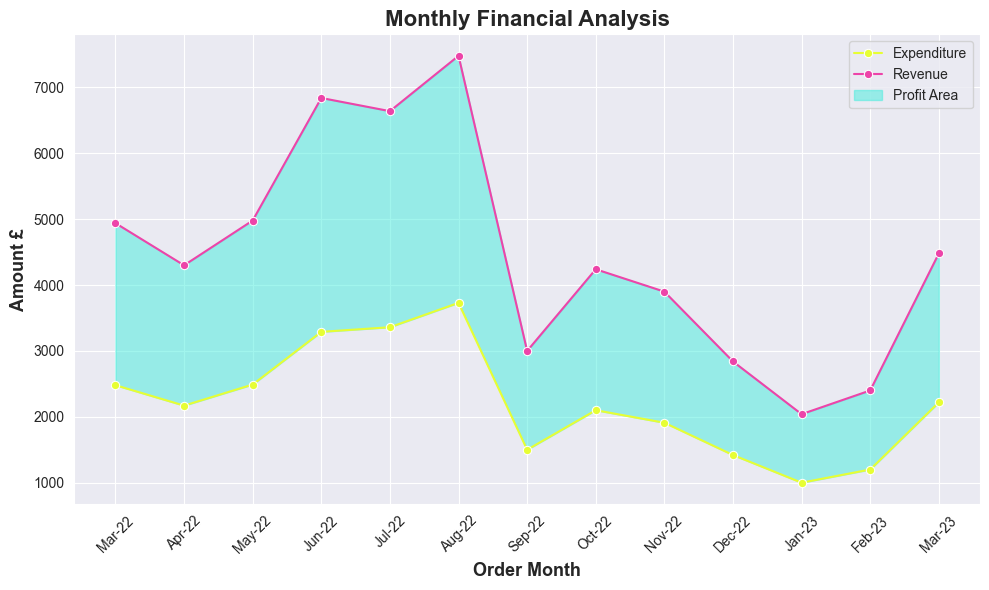

In [7]:
# Seaborn prefers all the code in one cell for some reason

# let's copy this so as to keep it safe first
month_grouped = cost_analysis.copy()

# Create 'order_month' column based on 'order_date'
month_grouped['order_month'] = month_grouped['order_date'].dt.to_period('M')

# Group by 'order_month' and aggregate the sums
grouped_by_month = month_grouped.groupby('order_month').agg({
    'expenditure': 'sum',
    'revenue': 'sum',
    'profit': 'sum'
}).reset_index()

# -------------------------------------------------------------------

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Convert 'order_month' to datetime format
grouped_by_month['order_month'] = pd.to_datetime(grouped_by_month['order_month'].astype('datetime64'))

# Format the 'order_month' to a string like "Jan-23"
grouped_by_month['formatted_month'] = grouped_by_month['order_month'].dt.strftime('%b-%y')

# Plot the line for 'expenditure' and 'revenue' with markers
sns.lineplot(x='formatted_month', y='expenditure', data=grouped_by_month, ax=ax, label='Expenditure', marker='o', color='#E7FE34')
sns.lineplot(x='formatted_month', y='revenue', data=grouped_by_month, ax=ax, label='Revenue', marker='o', color='#ED44A9')

# Shade the area between 'expenditure' and 'revenue' to represent profit
ax.fill_between(grouped_by_month['formatted_month'], grouped_by_month['expenditure'], grouped_by_month['revenue'], color='#44EDDD', alpha=0.5, label='Profit Area')

# Add labels and title with specific font sizes and boldness
plt.xlabel('Order Month', fontsize=13, fontweight='bold')
plt.ylabel('Amount £', fontsize=13, fontweight='bold')
plt.title('Monthly Financial Analysis', fontsize=16, fontweight='bold')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Add legend
plt.legend()

plt.tight_layout()

plt.savefig('/Users/lottiejanepollare/Library/Mobile Documents/com~apple~CloudDocs/CV, Profiles, Interviews & Job Applications/applications/techmodal_analyst_data_engineer/20230825_Analyst_case_study_submission_Lottie_Jane_Pollard/images/data_visualisations/fig7_monthly_financial_analysis.png')

plt.show()

In [8]:
# Calculate the average monthly profit margin as a percentage
grouped_by_month['avg_monthly_profit_margin'] = (grouped_by_month['profit'] / grouped_by_month['revenue']) * 100

# Weighted Average Method
weighted_yearly_avg_profit_margin = (grouped_by_month['avg_monthly_profit_margin'] * grouped_by_month['revenue']).sum() / grouped_by_month['revenue'].sum()

print(f"Weighted Yearly Average Profit Margin: {weighted_yearly_avg_profit_margin:.2f}%")

Weighted Yearly Average Profit Margin: 50.29%


### This could have been the figures for last year in terms of revenue, expenditure & profit using Option 4. With a weighted average monthly profit margin of 50.29%

# CONCLUSION:

### Had I had more time, I'd like to have looked at the relationship with the Prophet growth model, fixed my bugs with the pd.merge code & explored more of the trends.

In [9]:
# read through all the notes I've got printed off
# go through other interview areas
# go over my CV & Linked In

# graph for orders over 1 year
# change the logo spelling mistake
# check the word defence everywhere
# conclusion

# run the sql script
# put the presentation together
# VBA Script for presentation
# letter / report to Mr Haulage
    # - present actionable recommendations - easy to list format
# git & github
# email to Techmodal

# Complete report for Mr Haulage
# advise our logistics software - expend once to receive return on all deliveries forever